# Task 2: Using Python and machine learning, find the age of the person in the photo. You can use any image

In [1]:
# install deep face library
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=118ef30976ee8d8f37b147ba7e60ae5b9c4361418fa8be0b1eb7c199e33ad712
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [20]:
# import important libraries
from deepface import DeepFace
from google.colab.patches import cv2_imshow

In [21]:
# downlaod image
!wget https://t3.ftcdn.net/jpg/02/99/04/20/360_F_299042079_vGBD7wIlSeNl7vOevWHiL93G4koMM967.jpg

--2023-09-06 19:21:30--  https://t3.ftcdn.net/jpg/02/99/04/20/360_F_299042079_vGBD7wIlSeNl7vOevWHiL93G4koMM967.jpg
Resolving t3.ftcdn.net (t3.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to t3.ftcdn.net (t3.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29249 (29K) [image/jpeg]
Saving to: ‘360_F_299042079_vGBD7wIlSeNl7vOevWHiL93G4koMM967.jpg.1’

360_F_299042079_vGB 100%[===================>]  28.56K  --.-KB/s    in 0.003s  

2023-09-06 19:21:30 (10.2 MB/s) - ‘360_F_299042079_vGBD7wIlSeNl7vOevWHiL93G4koMM967.jpg.1’ saved [29249/29249]



In [22]:
# these all are face detector model we use retinaface because its has more accuracy
backends = [
  'opencv',
  'ssd',
  'dlib',
  'mtcnn',
  'retinaface',
  'mediapipe'
]

In [23]:
import cv2
frame = cv2.imread("/content/360_F_299042079_vGBD7wIlSeNl7vOevWHiL93G4koMM967.jpg")

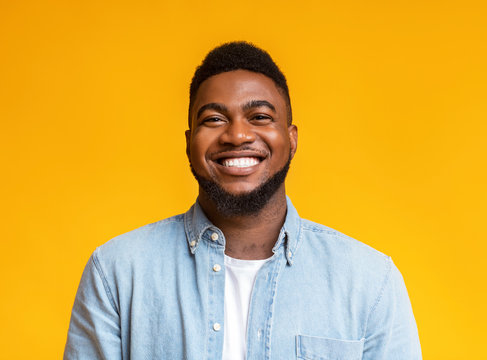

In [24]:
cv2_imshow(frame)

In [25]:
# taking prediction on the image
results=DeepFace.analyze(
      img_path = frame,
      actions = ['age','gender'],
      detector_backend = backends[-2],
      enforce_detection = False)[0]

Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


In [26]:
# here is the result of the prediction
results

{'age': 25,
 'region': {'x': 191, 'y': 67, 'w': 97, 'h': 130},
 'gender': {'Woman': 0.011014563642675057, 'Man': 99.98898506164551},
 'dominant_gender': 'Man'}

In [18]:
# get rectangle values
x,y,w,h=results['region'].values()

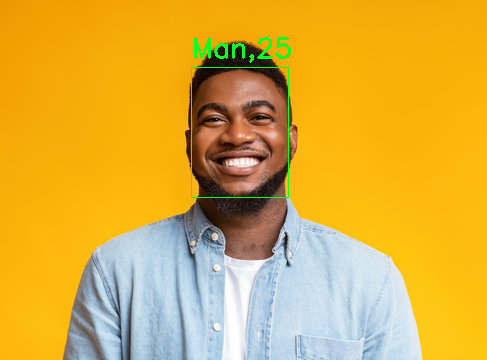

In [27]:
# draw a rectangle
image = cv2.rectangle(frame, (x, y), (x + w, y + h), (36,255,12), 1)
cv2.putText(image, f"{results['dominant_gender']},{results['age']}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
cv2_imshow(image)